CASE 1

/tmp/ipykernel_36277/1732989310.py:33: RuntimeWarning: divide by zero encountered in divide
  return 1 / (1 + (viscosity_CO2 / viscosity_water) * (perm['kr_water'] / perm['kr_CO2']))


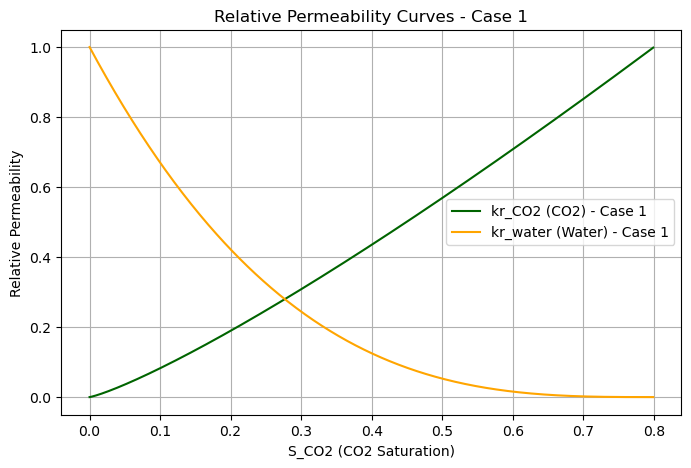

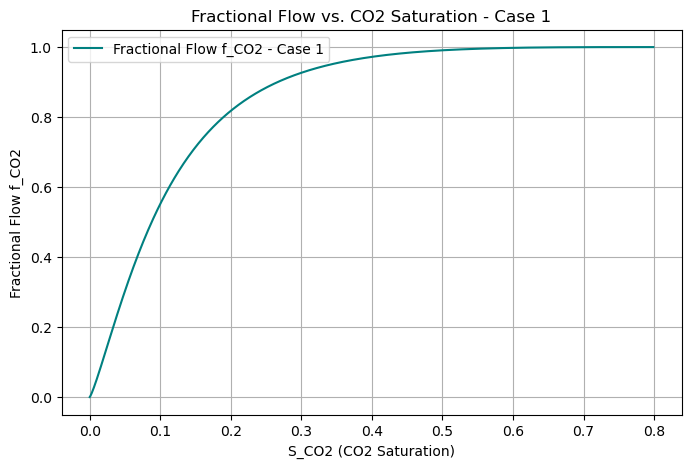

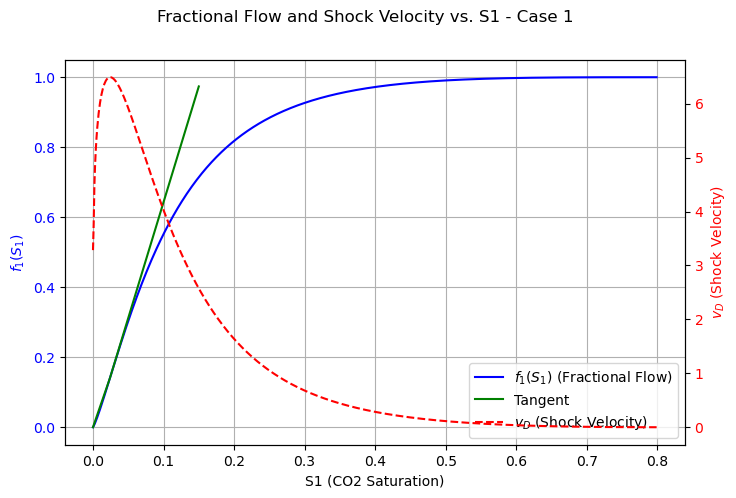

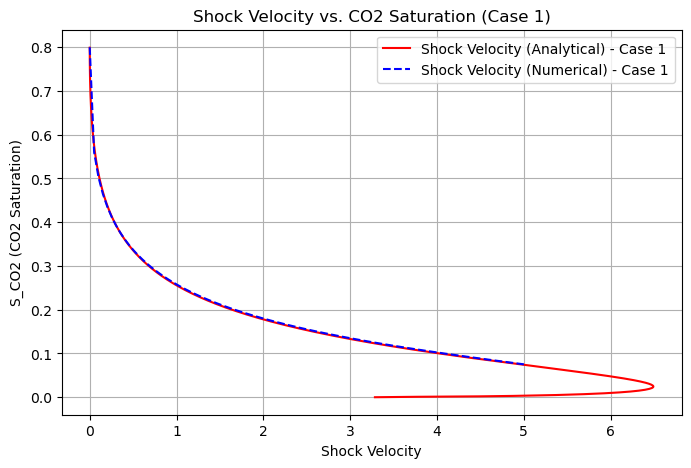

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define physical parameters
viscosity_CO2 = 0.1
viscosity_water = 1.0
kr_CO2_max = 1.0
kr_water_max = 1.0
alpha = 1.2
beta = 3.0
S_CO2_initial = 0.0
S_water_residual = 0.2
increment_S_CO2 = 0.001

# Define saturation range
S_CO2 = np.arange(S_CO2_initial, 1 - S_water_residual, increment_S_CO2)

# Compute effective saturation
def saturation_effective(S_CO2, S_CO2_initial, S_water_residual):
    return (S_CO2 - S_CO2_initial) / (1 - S_water_residual - S_CO2_initial)

# Define relative permeability functions
def compute_relative_permeability(S_CO2, alpha=1.2, beta=3.0):
    S_eff = np.clip(saturation_effective(S_CO2, S_CO2_initial, S_water_residual), 0, 1)
    kr_CO2 = kr_CO2_max * S_eff ** alpha
    kr_water = kr_water_max * (1 - S_eff) ** beta
    return {'kr_CO2': kr_CO2, 'kr_water': kr_water}

# Compute fractional flow
def fractional_flow_CO2(S_CO2):
    perm = compute_relative_permeability(S_CO2)
    return 1 / (1 + (viscosity_CO2 / viscosity_water) * (perm['kr_water'] / perm['kr_CO2']))

# Compute derivative of fractional flow
def fractional_flow_derivative(S_CO2, dS=1e-4):
    return (fractional_flow_CO2(S_CO2 + dS) - fractional_flow_CO2(S_CO2)) / dS

# Compute permeability, fractional flow, and velocity
perm_values = compute_relative_permeability(S_CO2)
f_CO2 = fractional_flow_CO2(S_CO2)
shock_velocity = np.gradient(f_CO2, S_CO2)

# Numerical simulation parameters
dx = 0.01  # Grid block size
dt = 0.001 # Time step size
Nx = 100   # Number of spatial grid blocks
Nt = 200   # Number of timesteps
L = Nx * dx
T = Nt * dt

# Initialize numerical simulation
x = np.linspace(0, L, Nx)
S1_num = np.zeros((Nt, Nx))
S1_num[0, :] = S_CO2_initial
S1_inj = 1 - S_water_residual

# Define function for fractional flow in numerical simulation
def fw(S1):
    rel_perm = compute_relative_permeability(S1)
    return (rel_perm['kr_CO2'] / viscosity_CO2) / ((rel_perm['kr_CO2'] / viscosity_CO2) + (rel_perm['kr_water'] / viscosity_water))

# Apply finite difference method
for n in range(1, Nt):
    S1_num[n] = S1_num[n-1].copy()
    S1_num[n, 0] = S1_inj
    for i in range(1, Nx):
        S1_num[n, i] = S1_num[n-1, i] - (dt/dx) * (fw(S1_num[n-1, i]) - fw(S1_num[n-1, i-1]))

# Compute numerical dimensionless velocity
vD_num = x / T

# Plot Relative Permeability
plt.figure(figsize=(8, 5))
plt.plot(S_CO2, perm_values['kr_CO2'], label='kr_CO2 (CO2) - Case 1', color='darkgreen')
plt.plot(S_CO2, perm_values['kr_water'], label='kr_water (Water) - Case 1', color='orange')
plt.xlabel('S_CO2 (CO2 Saturation)')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability Curves - Case 1')
plt.legend()
plt.grid()
plt.show()

# Plot Fractional Flow vs. CO2 Saturation
plt.figure(figsize=(8, 5))
plt.plot(S_CO2, f_CO2, label='Fractional Flow f_CO2 - Case 1', color='teal')
plt.xlabel('S_CO2 (CO2 Saturation)')
plt.ylabel('Fractional Flow f_CO2')
plt.title('Fractional Flow vs. CO2 Saturation - Case 1')
plt.legend()
plt.grid()
plt.show()

# Plot Fractional Flow and Shock Velocity vs. S1
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(S_CO2, f_CO2, label=r'$f_1(S_1)$ (Fractional Flow)', color='blue')
ax1.plot(tan_x, tan_y, label='Tangent', color='green')
ax1.set_xlabel('S1 (CO2 Saturation)')
ax1.set_ylabel(r'$f_1(S_1)$', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(S_CO2, shock_velocity, label=r'$v_D$ (Shock Velocity)', color='red', linestyle='--')
ax2.set_ylabel(r'$v_D$ (Shock Velocity)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
fig.suptitle('Fractional Flow and Shock Velocity vs. S1 - Case 1')
plt.show()

# Plot Shock Velocity vs CO2 Saturation (Analytical & Numerical)
plt.figure(figsize=(8, 5))
plt.plot(shock_velocity, S_CO2, color='red', label='Shock Velocity (Analytical) - Case 1')
plt.plot(vD_num, S1_num[-1], color='blue', linestyle='dashed', label='Shock Velocity (Numerical) - Case 1')
plt.ylabel('S_CO2 (CO2 Saturation)')
plt.xlabel('Shock Velocity')
plt.title('Shock Velocity vs. CO2 Saturation (Case 1)')
plt.legend()
plt.grid()
plt.show()

Case 2

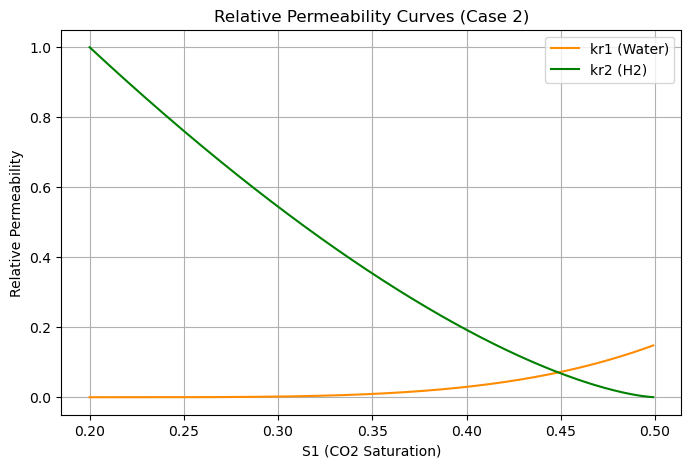

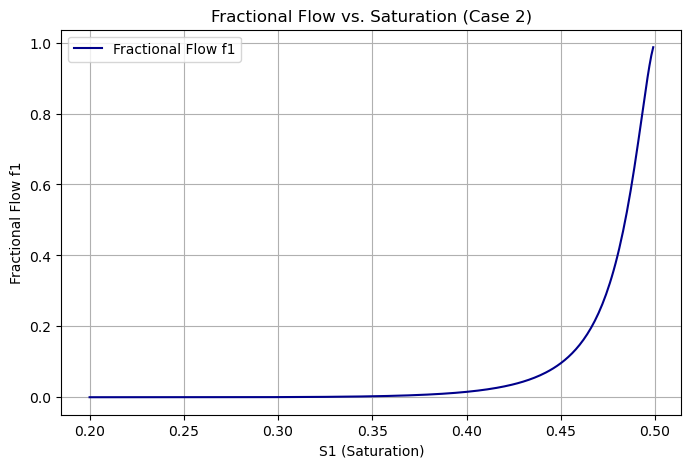

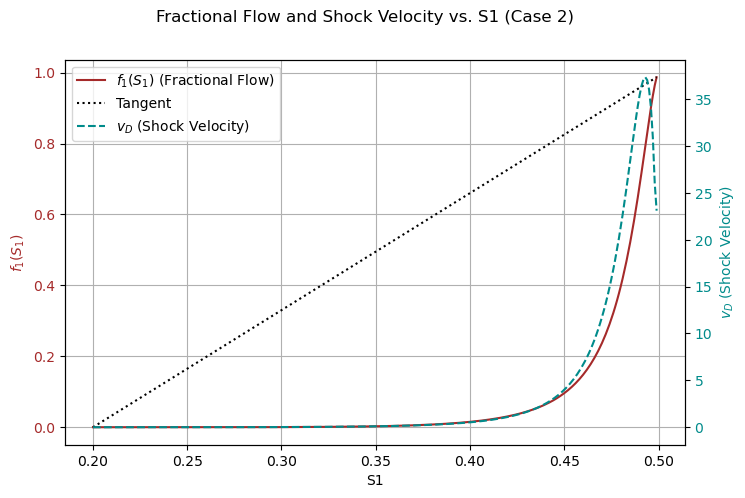

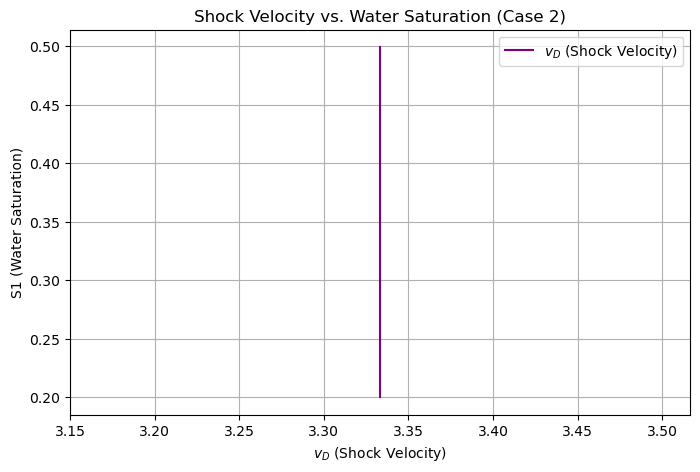

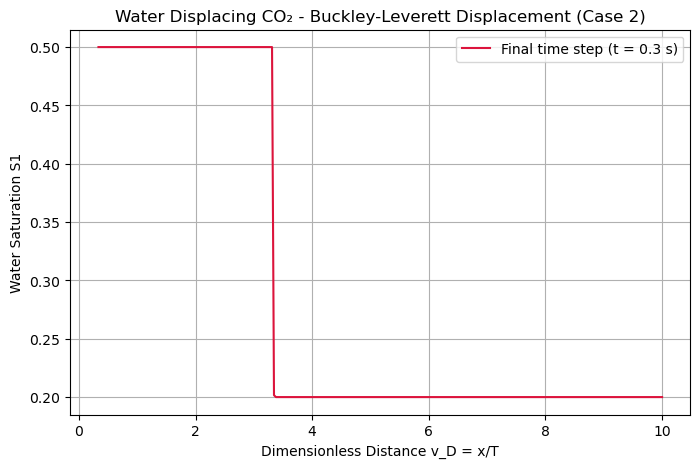

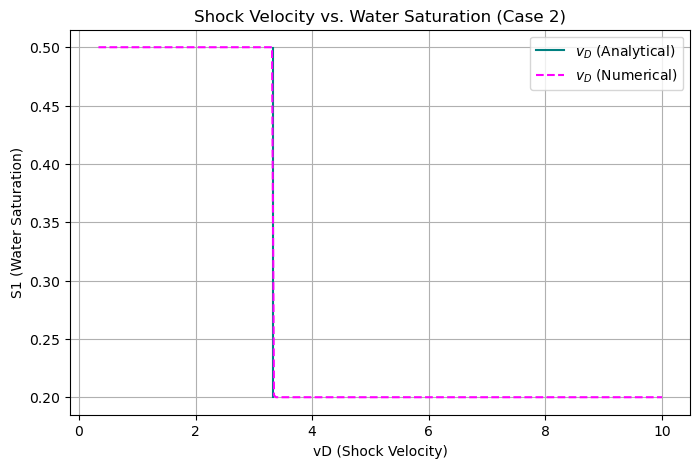

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Case 2 (Water-H2)
visc1 = 1.0  # Water viscosity (mPa.s)
visc2 = 0.1  # CO₂ viscosity (mPa.s)
kr1max = 0.15
kr2max = 1.0
a = 4          # Corey exponent for Water
b = 1.5        # Corey exponent for CO₂
S1i = 0.2
S2r = 0.5
delta_S1 = 0.001

# Generate saturation range
S1 = np.arange(S1i, 1 - S2r, delta_S1)

# Effective saturation function
def effective_saturation(S1, S1i, S2r):
    return (S1 - S1i) / (1 - S2r - S1i)

# Relative permeability functions
def relative_permeability(S1, a=4, b=1.5):
    Se = np.clip(effective_saturation(S1, S1i, S2r), 0, 1)
    kr1 = np.clip(kr1max * Se ** a, 0, kr1max)
    kr2 = np.clip(kr2max * (1 - Se) ** b, 0, kr2max)
    return {'kr1': kr1, 'kr2': kr2}

# Fractional flow function
def fractional_flow(S1):
    rel_perm = relative_permeability(S1)
    denominator = (rel_perm['kr1'] / visc1) + (rel_perm['kr2'] / visc2)
    return np.where(denominator != 0, (rel_perm['kr1'] / visc1) / denominator, 0)

# Calculate relative permeability, fractional flow, and shock velocity
rel_perm = relative_permeability(S1)
f1 = fractional_flow(S1)
vD = np.gradient(f1, S1)

# Shock determination
shock = [0]
for j in range(1, len(S1)):
    shock.append(f1[j]/(S1[j]-S1i))
tangent_shock = 1/(1-S1i-S2r)
shock_index = np.argmax(shock)
S1_shock = S1[shock_index]
f1_shock = f1[shock_index]

# Tangent line for visualization
tan_x = [S1i, S1_shock]
tan_y = [0, f1_shock]

# Prepare shock velocity plot
vD_plot = np.where(S1 > S1_shock, vD, tangent_shock)

# Numerical Simulation for Buckley-Leverett
dx = 0.01 # Grid block size
dt = 0.001 # Time step size
Nx = 300 # Number of spatial grid blocks
Nt = 300 # Number of timesteps
L = Nx * dx
T = Nt * dt
x = np.linspace(0, L, Nx)

S1_num = np.zeros((Nt, Nx))
S1_num[0, :] = S1i
S1_inj = 1 - S2r

for n in range(1, Nt):
    S1_num[n] = S1_num[n-1].copy()
    S1_num[n, 0] = S1_inj
    for i in range(1, Nx):
        fw_diff = fractional_flow(S1_num[n-1, i]) - fractional_flow(S1_num[n-1, i-1])
        S1_num[n, i] = S1_num[n-1, i] - (dt/dx) * fw_diff

vD_num = x / T

# Plot 1: Relative Permeability
plt.figure(figsize=(8, 5))
plt.plot(S1, rel_perm['kr1'], label='kr1 (Water)', color='darkorange')
plt.plot(S1, rel_perm['kr2'], label='kr2 (H2)', color='green')
plt.xlabel('S1 (CO2 Saturation)')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability Curves (Case 2)')
plt.legend()
plt.grid()
plt.show()

# Plot 2: Fractional Flow
plt.figure(figsize=(8, 5))
plt.plot(S1, f1, label='Fractional Flow f1', color='darkblue')
plt.xlabel('S1 (Saturation)')
plt.ylabel('Fractional Flow f1')
plt.title('Fractional Flow vs. Saturation (Case 2)')
plt.legend()
plt.grid()
plt.show()

# Plot 3: Fractional Flow + Shock Velocity
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(S1, f1, label=r'$f_1(S_1)$ (Fractional Flow)', color='brown')
ax1.plot(tan_x, tan_y, label='Tangent', color='black', linestyle='dotted')
ax1.set_xlabel('S1')
ax1.set_ylabel(r'$f_1(S_1)$', color='brown')
ax1.tick_params(axis='y', labelcolor='brown')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(S1, vD, label=r'$v_D$ (Shock Velocity)', color='darkcyan', linestyle='--')
ax2.set_ylabel(r'$v_D$ (Shock Velocity)', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

fig.suptitle('Fractional Flow and Shock Velocity vs. S1 (Case 2)')
plt.show()

# Plot 4: Shock Velocity vs. Water Saturation
plt.figure(figsize=(8, 5))
plt.plot(vD_plot, S1, color='purple', label=r'$v_D$ (Shock Velocity)')
plt.xlabel(r'$v_D$ (Shock Velocity)')
plt.ylabel('S1 (Water Saturation)')
plt.title('Shock Velocity vs. Water Saturation (Case 2)')
plt.legend()
plt.grid()
plt.show()

# Plot 5: Buckley-Leverett Displacement
plt.figure(figsize=(8, 5))
plt.plot(vD_num[10:], S1_num[-1, 10:], label=f'Final time step (t = {T:.1f} s)', color='crimson')
plt.xlabel('Dimensionless Distance v_D = x/T')
plt.ylabel('Water Saturation S1')
plt.title('Water Displacing CO₂ - Buckley-Leverett Displacement (Case 2)')
plt.legend()
plt.grid()
plt.show()

# Plot 6: Analytical vs. Numerical Shock Velocity
plt.figure(figsize=(8, 5))
plt.plot(vD_plot, S1, color='teal', label=r'$v_D$ (Analytical)')
plt.plot(vD_num[10:], S1_num[-1, 10:], color='magenta', linestyle='dashed', label=r'$v_D$ (Numerical)')
plt.xlabel('vD (Shock Velocity)')
plt.ylabel('S1 (Water Saturation)')
plt.title('Shock Velocity vs. Water Saturation (Case 2)')
plt.legend()
plt.grid()
plt.show()

Case 3

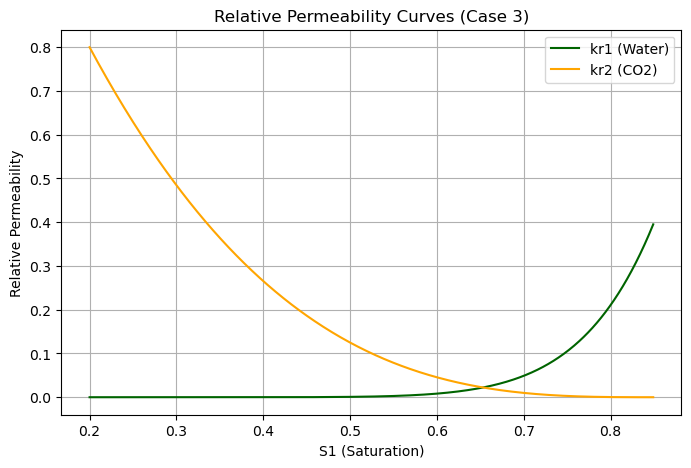

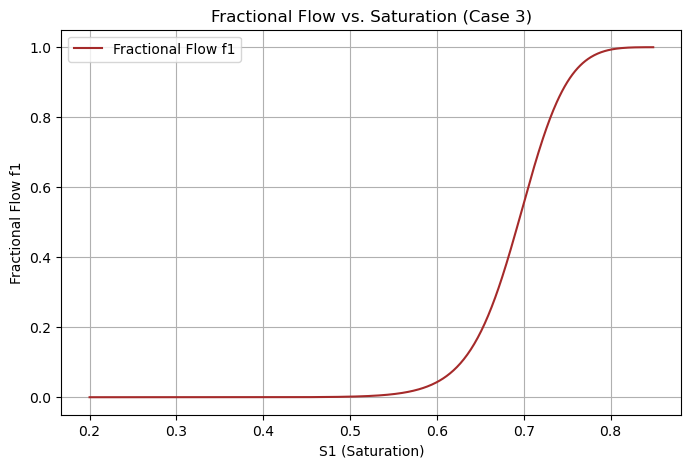

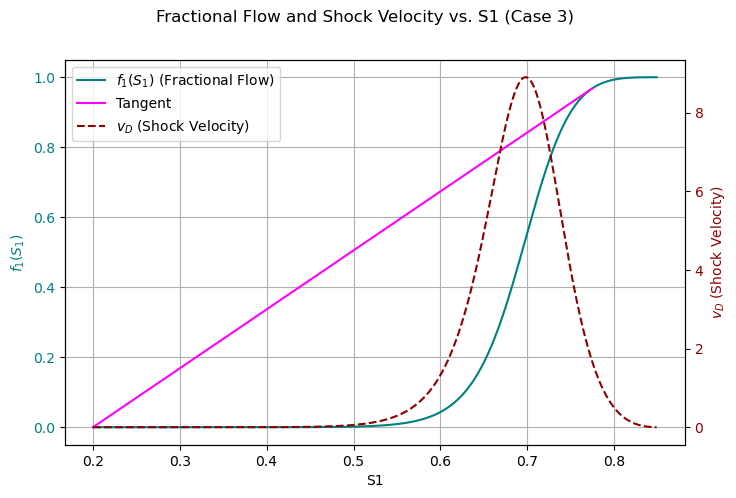

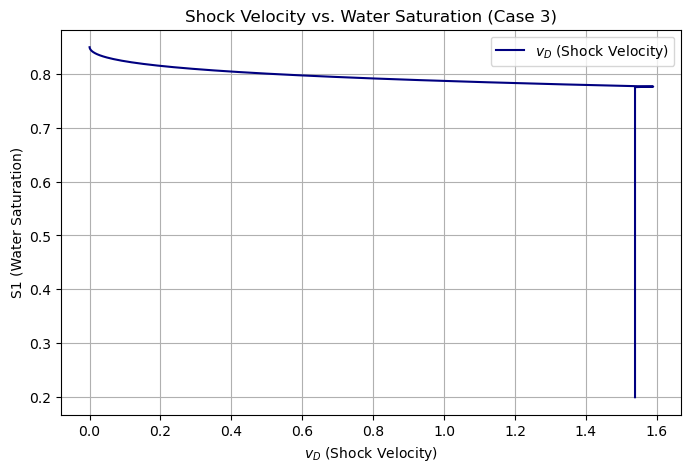

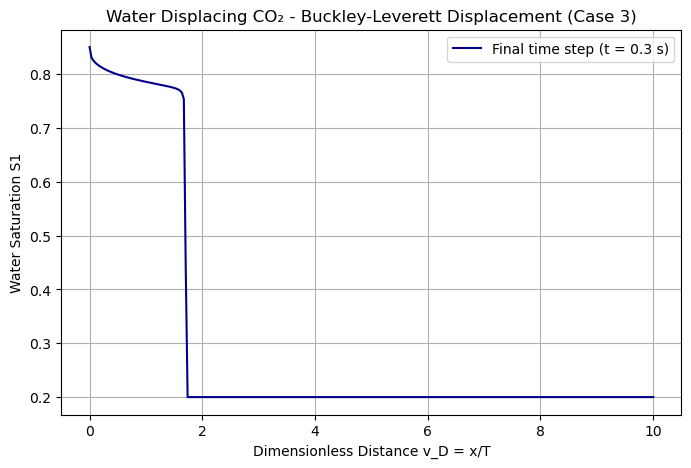

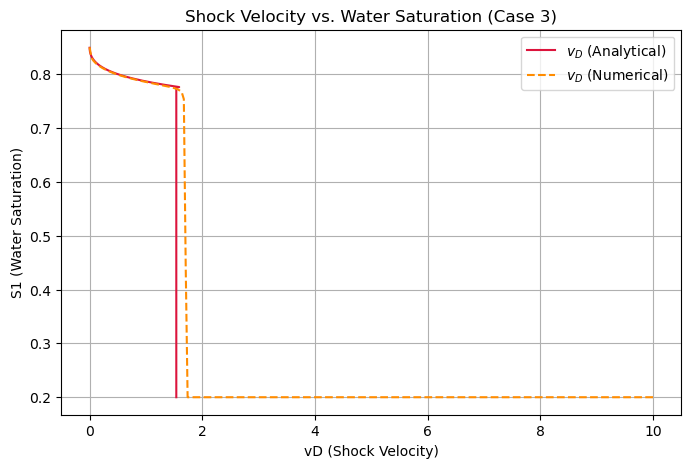

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for Case 3 (Water-CO₂)
visc1 = 0.4  # Water viscosity (mPa.s)
visc2 = 0.1  # CO₂ viscosity (mPa.s)
kr1max = 0.4
kr2max = 0.8
a = 8  # Corey exponent for Water
b = 3  # Corey exponent for CO₂
S1i = 0.2
S2r = 0.15
delta_S1 = 0.001

# Generate saturation range
S1 = np.arange(S1i, 1 - S2r, delta_S1)

# Effective saturation function
def effective_saturation(S1, S1i, S2r):
    return (S1 - S1i) / (1 - S2r - S1i)

# Relative permeability functions
def relative_permeability(S1, a=8, b=3):
    Se = np.clip(effective_saturation(S1, S1i, S2r), 0, 1)
    kr1 = np.clip(kr1max * Se ** a, 0, kr1max)
    kr2 = np.clip(kr2max * (1 - Se) ** b, 0, kr2max)
    return {'kr1': kr1, 'kr2': kr2}

# Fractional flow function
def fractional_flow(S1):
    rel_perm = relative_permeability(S1)
    denominator = (rel_perm['kr1'] / visc1) + (rel_perm['kr2'] / visc2)
    return np.where(denominator != 0, (rel_perm['kr1'] / visc1) / denominator, 0)

# Calculate relative permeability, fractional flow, and shock velocity
rel_perm = relative_permeability(S1)
f1 = fractional_flow(S1)
vD = np.gradient(f1, S1)

# Shock determination
shock = [0]
for j in range(1, len(S1)):
    shock.append(f1[j] / (S1[j] - S1i))
tangent_shock = 1 / (1 - S1i - S2r)
shock_index = np.argmax(shock)
S1_shock = S1[shock_index]
f1_shock = f1[shock_index]

# Tangent line for visualization
tan_x = [S1i, S1_shock]
tan_y = [0, f1_shock]

# Prepare shock velocity plot
vD_plot = np.where(S1 > S1_shock, vD, tangent_shock)

# Numerical Simulation for Buckley-Leverett
dx = 0.01
dt = 0.001
Nx = 300
Nt = 300
L = Nx * dx
T = Nt * dt
x = np.linspace(0, L, Nx)

S1_num = np.zeros((Nt, Nx))
S1_num[0, :] = S1i
S1_inj = 1 - S2r

for n in range(1, Nt):
    S1_num[n] = S1_num[n-1].copy()
    S1_num[n, 0] = S1_inj
    for i in range(1, Nx):
        fw_diff = fractional_flow(S1_num[n-1, i]) - fractional_flow(S1_num[n-1, i-1])
        S1_num[n, i] = S1_num[n-1, i] - (dt/dx) * fw_diff

vD_num = x / T

# Plot Relative Permeability
plt.figure(figsize=(8, 5))
plt.plot(S1, rel_perm['kr1'], label='kr1 (Water)', color='darkgreen')
plt.plot(S1, rel_perm['kr2'], label='kr2 (CO2)', color='orange')
plt.xlabel('S1 (Saturation)')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability Curves (Case 3)')
plt.legend()
plt.grid()
plt.show()

# Plot Fractional Flow
plt.figure(figsize=(8, 5))
plt.plot(S1, f1, label='Fractional Flow f1', color='brown')
plt.xlabel('S1 (Saturation)')
plt.ylabel('Fractional Flow f1')
plt.title('Fractional Flow vs. Saturation (Case 3)')
plt.legend()
plt.grid()
plt.show()

# Plot Fractional Flow + Shock Velocity
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(S1, f1, label=r'$f_1(S_1)$ (Fractional Flow)', color='teal')
ax1.plot(tan_x, tan_y, label='Tangent', color='magenta')
ax1.set_xlabel('S1')
ax1.set_ylabel(r'$f_1(S_1)$', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(S1, vD, label=r'$v_D$ (Shock Velocity)', color='darkred', linestyle='--')
ax2.set_ylabel(r'$v_D$ (Shock Velocity)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

fig.suptitle('Fractional Flow and Shock Velocity vs. S1 (Case 3)')
plt.show()

# Plot Shock Velocity vs. Water Saturation
plt.figure(figsize=(8, 5))
plt.plot(vD_plot, S1, color='navy', label=r'$v_D$ (Shock Velocity)')
plt.xlabel(r'$v_D$ (Shock Velocity)')
plt.ylabel('S1 (Water Saturation)')
plt.title('Shock Velocity vs. Water Saturation (Case 3)')
plt.legend()
plt.grid()
plt.show()

# Plot Numerical Simulation vs Analytical
plt.figure(figsize=(8, 5))
plt.plot(vD_num, S1_num[-1], label=f'Final time step (t = {T:.1f} s)', color='darkblue')
plt.xlabel('Dimensionless Distance v_D = x/T')
plt.ylabel('Water Saturation S1')
plt.title('Water Displacing CO₂ - Buckley-Leverett Displacement (Case 3)')
plt.legend()
plt.grid()
plt.show()

# Compare Analytical vs Numerical Shock Velocity
plt.figure(figsize=(8, 5))
plt.plot(vD_plot, S1, color='crimson', label=r'$v_D$ (Analytical)')
plt.plot(vD_num, S1_num[-1], color='darkorange', linestyle='dashed', label=r'$v_D$ (Numerical)')
plt.xlabel('vD (Shock Velocity)')
plt.ylabel('S1 (Water Saturation)')
plt.title('Shock Velocity vs. Water Saturation (Case 3)')
plt.legend()
plt.grid()
plt.show()